# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# do time.sleep(1) for delay

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:30]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | beitbridge
Processing Record 6 of Set 1 | yung shue wan
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | taiohae
Processing Record 9 of Set 1 | mirpur sakro
Processing Record 10 of Set 1 | xiaoweizhai
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | koson
Processing Record 13 of Set 1 | sinop
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | savanna-la-mar
Processing Record 16 of Set 1 | ares
Processing Record 17 of Set 1 | ola
Processing Record 18 of Set 1 | altamira
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | afaahiti
Processing Record 23 of Set 1 | bulg

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          30
Lat           29
Lng           29
Max Temp      29
Humidity      29
Cloudiness    29
Wind Speed    29
Country       29
Date          29
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,296.69,19.0,86.0,3.30,RU,1.717738e+09
1,invercargill,-46.4000,168.3500,283.72,98.0,100.0,1.34,NZ,1.717738e+09
2,olonkinbyen,70.9221,-8.7187,273.32,96.0,83.0,4.70,SJ,1.717738e+09
3,kodiak,57.7900,-152.4072,280.88,81.0,100.0,3.60,US,1.717738e+09
4,beitbridge,-22.2167,30.0000,289.10,22.0,0.0,8.16,ZW,1.717738e+09


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,296.69,19.0,86.0,3.30,RU,1.717738e+09
1,invercargill,-46.4000,168.3500,283.72,98.0,100.0,1.34,NZ,1.717738e+09
2,olonkinbyen,70.9221,-8.7187,273.32,96.0,83.0,4.70,SJ,1.717738e+09
3,kodiak,57.7900,-152.4072,280.88,81.0,100.0,3.60,US,1.717738e+09
4,beitbridge,-22.2167,30.0000,289.10,22.0,0.0,8.16,ZW,1.717738e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

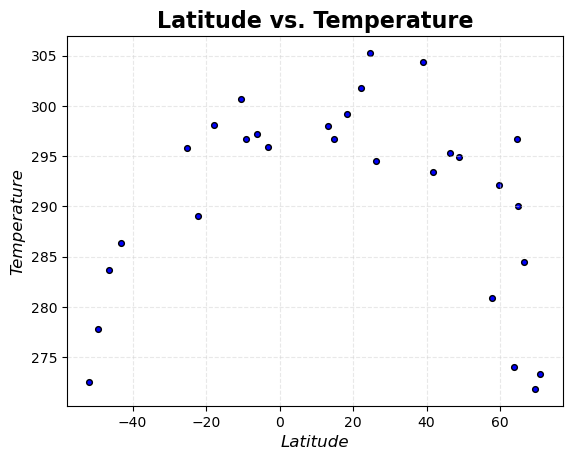

<Figure size 640x480 with 0 Axes>

In [34]:
# Build scatter plot for latitude vs. temperature
Lat= city_data_df.Lat
Temp= city_data_df["Max Temp"]

plt.scatter(Lat, Temp, facecolor="Blue", edgecolor="black", s=17)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Temperature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.show()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

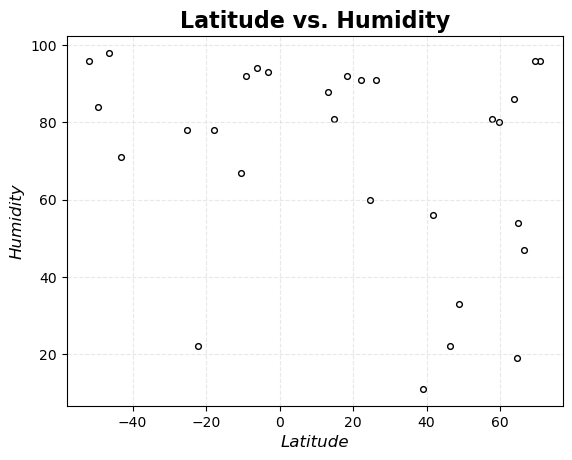

<Figure size 640x480 with 0 Axes>

In [35]:
# Build the scatter plots for latitude vs. humidity
Lat= city_data_df.Lat
Hum= city_data_df.Humidity

plt.scatter(Lat, Hum, facecolor="white", edgecolor="black", s=17)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Humidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

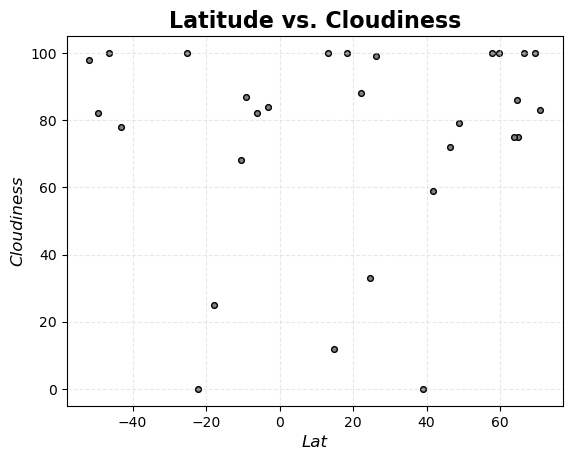

<Figure size 640x480 with 0 Axes>

In [36]:
# Build the scatter plots for latitude vs. cloudiness
Lat= city_data_df.Lat
Cloud= city_data_df.Cloudiness

plt.scatter(Lat, Cloud, facecolor="gray", edgecolor="black", s=17)

# Step 4: Customizations
plt.xlabel("Lat", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.show()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

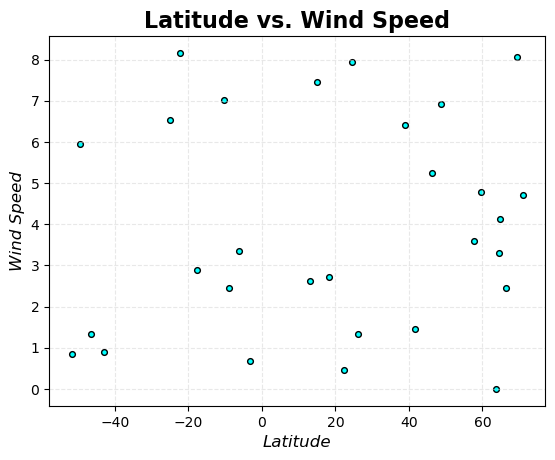

<Figure size 640x480 with 0 Axes>

In [37]:
# Build the scatter plots for latitude vs. wind speed
Lat= city_data_df.Lat
Wind= city_data_df["Wind Speed"]

plt.scatter(Lat, Wind, facecolor="aqua", edgecolor="black", s=17)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.show()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, xlabel='X', ylabel='Y', title='Linear Regression Plot'):

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(x_value, y_value, facecolor="maroon", edgecolor="black", s=17)
plt.plot(x_value, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("xlabel", fontsize=12, fontstyle="italic")
plt.ylabel("ylabel", fontsize=12, fontstyle="italic")
plt.title("xlabel vs ylabel", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# plt.xlim(-7000, 550000)
# plt.ylim(0, 10.5)
plt.annotate(line_eq,(min(x),min(y)), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')
plt.show()

IndentationError: expected an indented block after function definition on line 3 (2980229408.py, line 6)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,303.15,72,0,1.93,IN,1717736810
3,fort bragg,35.1390,-79.0060,297.54,80,100,5.66,US,1717736542
4,grand falls-windsor,48.9332,-55.6649,281.21,95,100,0.28,CA,1717736811
6,utrik,11.2278,169.8474,301.27,82,89,7.38,MH,1717736811
8,jamestown,42.0970,-79.2353,291.92,77,100,3.09,US,1717736738


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,277.78,84,82,5.96,TF,1717736810
2,waingapu,-9.6567,120.2641,301.15,72,54,8.09,ID,1717736810
5,adamstown,-25.0660,-130.1015,295.79,78,100,6.53,PN,1717736811
7,port elizabeth,-33.9180,25.5701,288.20,91,92,4.02,ZA,1717736811
14,west island,-12.1568,96.8225,301.24,68,19,7.77,CC,1717736812


###  Temperature vs. Latitude Linear Regression Plot

the r^2 is : 0.6860599471665582


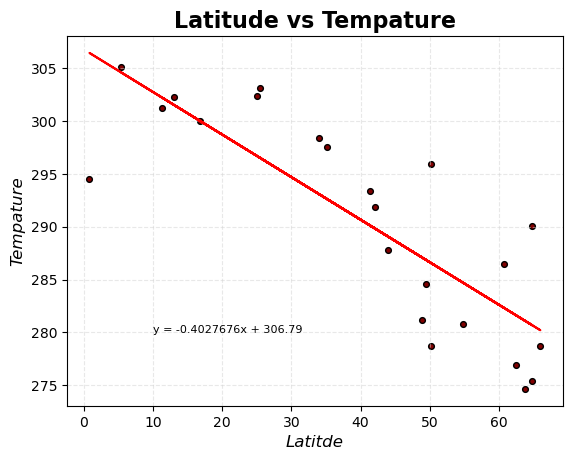

In [ ]:
# Linear regression on Northern Hemisphere
Lat = northern_hemi_df.Lat
Temp = northern_hemi_df["Max Temp"]

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, Temp)
regress_values = Lat * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(Lat, Temp, facecolor="maroon", edgecolor="black", s=17)
plt.plot(Lat, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("Latitde", fontsize=12, fontstyle="italic")
plt.ylabel("Tempature", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Tempature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# plt.xlim(-7000, 550000)
# plt.ylim(0, 10.5)
plt.annotate(line_eq,(10,280), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')

the r^2 is : 0.9663405169255699


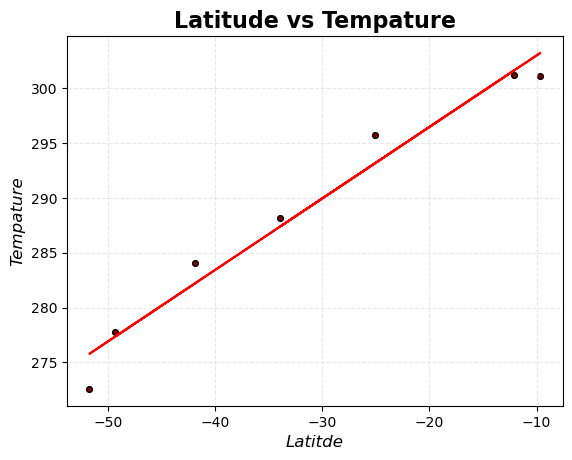

In [ ]:
# Linear regression on Southern Hemisphere
Lat = southern_hemi_df.Lat
Temp = southern_hemi_df["Max Temp"]

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, Temp)
regress_values = Lat * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(Lat, Temp, facecolor="maroon", edgecolor="black", s=17)
plt.plot(Lat, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("Latitde", fontsize=12, fontstyle="italic")
plt.ylabel("Tempature", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Tempature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# plt.xlim(-7000, 550000)
# plt.ylim(0, 10.5)
plt.annotate(line_eq,(10,280), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')

**Discussion about the linear relationship:** It seems the closer the latitude is to zero, the equator the warmer it is, and we can see the strong correlation on the slope of the best fit line

### Humidity vs. Latitude Linear Regression Plot

the r^2 is : 0.002113346213166742


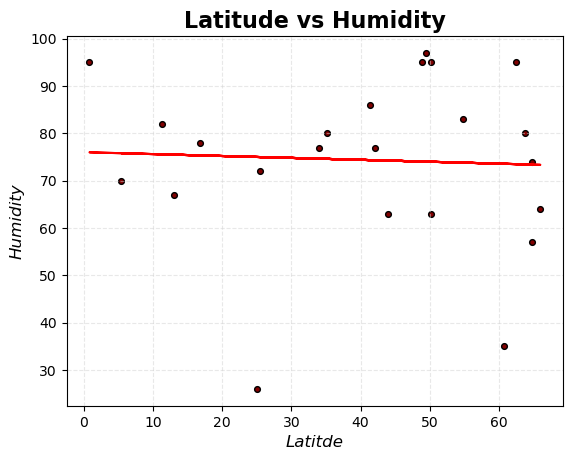

In [ ]:
# Northern Hemisphere
Lat = northern_hemi_df.Lat
Hum = northern_hemi_df.Humidity

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, Hum)
regress_values = Lat * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(Lat, Hum, facecolor="maroon", edgecolor="black", s=17)
plt.plot(Lat, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("Latitde", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# plt.xlim(-7000, 550000)
# plt.ylim(0, 10.5)
plt.annotate(line_eq,(10,280), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')

the r^2 is : 0.774380987278018


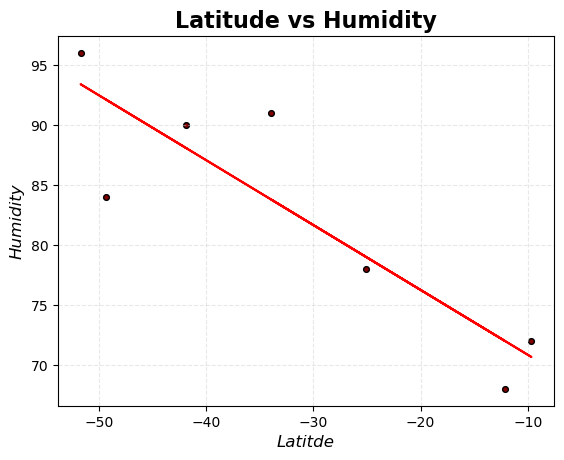

In [ ]:
# Southern Hemisphere
Lat = southern_hemi_df.Lat
Hum = southern_hemi_df.Humidity

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, Hum)
regress_values = Lat * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(Lat, Hum, facecolor="maroon", edgecolor="black", s=17)
plt.plot(Lat, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("Latitde", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# plt.xlim(-7000, 550000)
# plt.ylim(0, 10.5)
plt.annotate(line_eq,(10,280), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')

**Discussion about the linear relationship:** It might be because of such a small data set on the southern hemisphere that the correlation appears as strong as it is, but in the north, no correlation, in the south, strong negative

### Cloudiness vs. Latitude Linear Regression Plot

the r^2 is : 0.01954095097533409


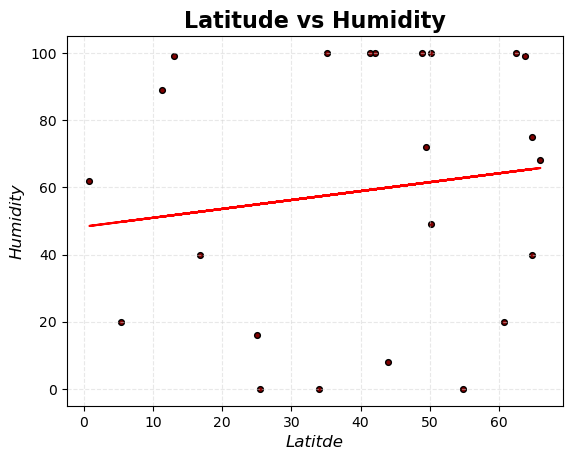

In [ ]:
# Northern Hemisphere
Lat = northern_hemi_df.Lat
Cloud = northern_hemi_df.Cloudiness

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, Cloud)
regress_values = Lat * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(Lat, Cloud, facecolor="maroon", edgecolor="black", s=17)
plt.plot(Lat, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("Latitde", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# plt.xlim(-7000, 550000)
# plt.ylim(0, 10.5)
plt.annotate(line_eq,(10,280), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')

the r^2 is : 0.5021136561047946


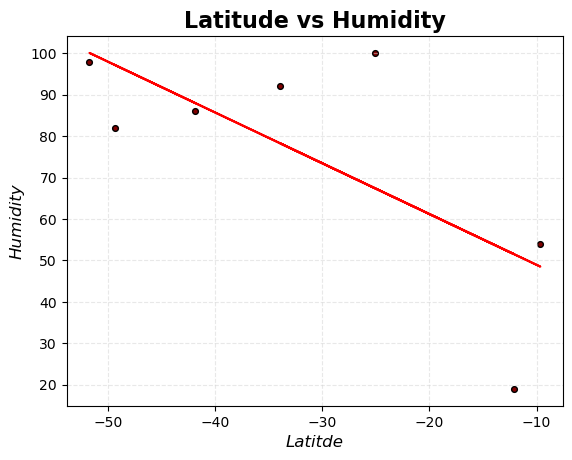

In [ ]:
# Southern Hemisphere
Lat = southern_hemi_df.Lat
Cloud = southern_hemi_df.Cloudiness

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, Cloud)
regress_values = Lat * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(Lat, Cloud, facecolor="maroon", edgecolor="black", s=17)
plt.plot(Lat, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("Latitde", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# plt.xlim(-7000, 550000)
# plt.ylim(0, 10.5)
plt.annotate(line_eq,(10,280), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')

**Discussion about the linear relationship:** They both appear to have a smiliar conclusion and the closer to the equator, the less cloud it is

### Wind Speed vs. Latitude Linear Regression Plot

the r^2 is : 0.049890229941244146


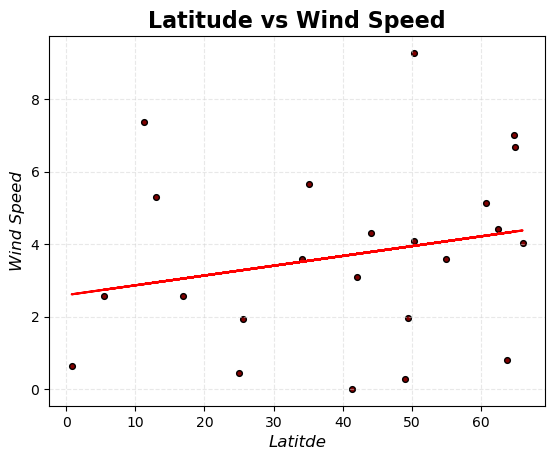

In [39]:
# Northern Hemisphere
Lat = northern_hemi_df.Lat
Wind = northern_hemi_df['Wind Speed']

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, Wind)
regress_values = Lat * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(Lat, Wind, facecolor="maroon", edgecolor="black", s=17)
plt.plot(Lat, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("Latitde", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# plt.xlim(-7000, 550000)
# plt.ylim(0, 10.5)
plt.annotate(line_eq,(10,280), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')

the r^2 is : 0.6550897326052151


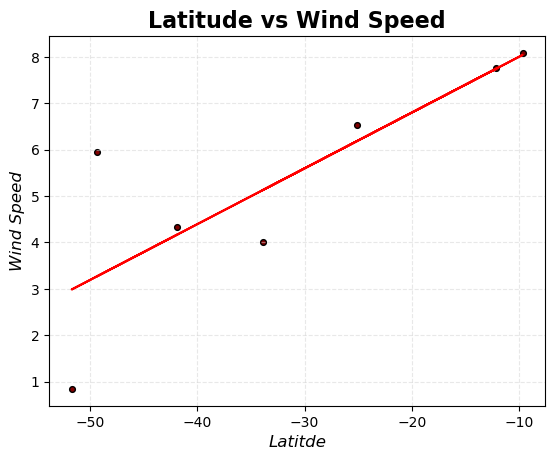

In [40]:
# Southern Hemisphere
Lat = southern_hemi_df.Lat
Wind = southern_hemi_df['Wind Speed']

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, Wind)
regress_values = Lat * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(Lat, Wind, facecolor="maroon", edgecolor="black", s=17)
plt.plot(Lat, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("Latitde", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# plt.xlim(-7000, 550000)
# plt.ylim(0, 10.5)
plt.annotate(line_eq,(10,280), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')

**Discussion about the linear relationship:** The furher south the stronger the speed appears to be the correlation between the two